In [1]:
# import libraries
import numpy as np
import csv
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.mixed_linear_model import MixedLMParams
import pandas as pd
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io.wavfile import write, read

In [2]:
# load data for t-test on ages

agedatapath = "/Users/anantajit/Desktop/UCSF/tables-and-figures/AD/age_data.csv"

labels = ["AD", "CONT"]

age_data = ([], [])

with open(agedatapath) as csv_file:
    csvreader = csv.reader(csv_file, delimiter=',')
    
    for row in csvreader:
        idx = labels.index(row[0])
        age_data[idx].append(float(row[1]))

In [3]:
# run t test on dataset
ttest_ages = stats.ttest_ind(age_data[0], age_data[1])

print(ttest_ages)

Ttest_indResult(statistic=-2.0560337717517676, pvalue=0.04956468473739082)


In [6]:
# mixed effects model on data 


statsdata = "/Users/anantajit/Desktop/UCSF/tables-and-figures/AD/post-analysis/run_stats_with_terciles.csv"
data = pd.read_csv(statsdata)

data["Subject"] = data["Subject"].astype("category")
data["Tercile"] = data["Tercile"].astype("category")


In [7]:
# Linear Mixed Effects Model
lmm = smf.mixedlm("Centering ~ Group + Tercile + Group * Tercile", data, groups=data["Subject"])

print(lmm.fit().cov_params())


                                    Intercept  Group[T.Controls]  \
Intercept                           11.081621         -11.074890   
Group[T.Controls]                  -11.074890          19.314958   
Tercile[T.UPPER]                    -4.051347           4.051347   
Group[T.Controls]:Tercile[T.UPPER]   4.051347          -6.061318   
Group Var                           -0.004349           0.003182   

                                    Tercile[T.UPPER]  \
Intercept                              -4.051347e+00   
Group[T.Controls]                       4.051347e+00   
Tercile[T.UPPER]                        8.102695e+00   
Group[T.Controls]:Tercile[T.UPPER]     -8.102695e+00   
Group Var                               3.093645e-18   

                                    Group[T.Controls]:Tercile[T.UPPER]  \
Intercept                                                 4.051347e+00   
Group[T.Controls]                                        -6.061318e+00   
Tercile[T.UPPER]                

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


trial 0 centered
trial 1 did not center
trial 2 did not center
trial 3 centered
trial 4 centered
trial 5 did not center
trial 6 centered
trial 7 did not center
trial 8 centered
trial 9 centered
trial 10 centered
trial 11 centered
trial 12 did not center
trial 13 centered
trial 14 centered
trial 15 centered
trial 16 centered
trial 17 centered
trial 18 did not center
trial 19 did not center
trial 20 centered
trial 21 centered
trial 22 did not center
trial 23 centered
trial 24 did not center
trial 25 did not center
trial 26 centered
Number of trials with centering out of 27:::17


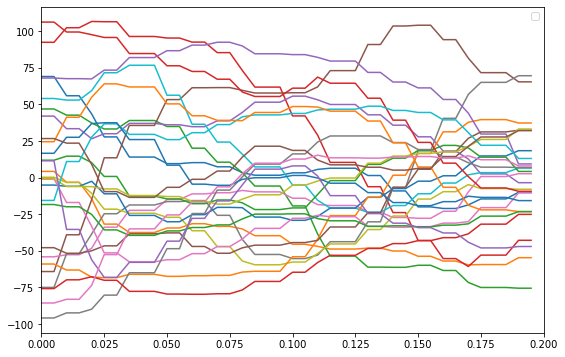

In [78]:
N = 27

mydata = "/Users/anantajit/Desktop/UCSF/mydata/me2/trial"

def convert_to_cents(data, median):
    return 1200 * np.log(np.divide(data, median))/np.log(2)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

plt.figure(figsize=(9,6))

taxis = np.arange(0, 0.200, step=0.005)

window_markers = [0, 0.05, 0.15, 0.2]
window_frames = []

for w in window_markers:
    window_frames.append(find_nearest(taxis, w))

frequency_aligned = np.zeros([N, len(taxis)])

for i in range(N):
    datapath = mydata + str(i) + ".f0.csv"
    data = pd.read_csv(datapath)

    for j,t in enumerate(taxis):
        frequency_aligned[i, j] = data["frequency"][find_nearest(data["time"],t)]


mean = np.mean(frequency_aligned, axis=0)

fc = frequency_aligned

# plt.plot(taxis, np.mean(fc, axis=0))


for i in range(N):
    fc[i, :] = convert_to_cents(fc[i,:], mean)
    if(i in range(N)):
        plt.plot(taxis, fc[i, :])
    # print(str(i) + ":::" + str(np.sum(np.abs(fc[i, :]) > 500)))
        # plt.plot([0, 0.05], np.ones(2) * np.mean(fc[i, window_frames[0]:window_frames[1]]), color="black")
        # plt.plot([0.05, 0.15], np.ones(2) * np.mean(fc[i, window_frames[0]:window_frames[1]]), color="black", linestyle="dashed")
        # plt.plot([0.05, 0.15], np.ones(2) * np.mean(fc[i, window_frames[2]:window_frames[3]]), color="black", linestyle="dashed")
        # plt.plot([0.15, 0.2], np.ones(2) * np.mean(fc[i, window_frames[2]:window_frames[3]]), color="black")


ccount = 0

for i in range(N):
    if(np.abs(np.mean(fc[i, window_frames[0]:window_frames[1]])) > np.abs(np.mean(fc[i, window_frames[2]:window_frames[3]]))):
        print("trial " + str(i) + " centered")
        ccount = ccount + 1
    else:
        print("trial " + str(i) + " did not center")

print("Number of trials with centering out of " + str(N) + ":::" + str(ccount))

plt.xlim([0, .200])
# plt.ylim([-150, 150])
plt.legend()
# plt.xlabel("time (s)", weight="bold")
# plt.ylabel("frequency (cents)", weight="bold")
# plt.title("Sample trial", weight="bold")


# plt.axvspan(0, 0.05, color='gray', alpha=0.25)
# plt.axvspan(0.15, 0.2, color='gray', alpha=0.25)
# plt.savefig('../../ucsf-paper/data/sample_trial.png')


plt.show()




(0.0, 0.2)

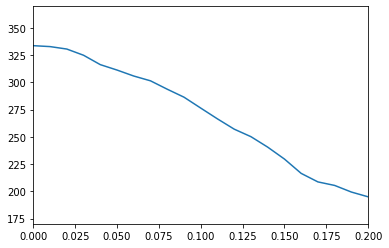

In [206]:
sample_trialpath = "/Users/anantajit/Desktop/UCSF/mydata/d/trial13.f0.csv"

plt.figure()
data = pd.read_csv(sample_trialpath)

# compute two window positions 
windows = [[0, 50], [150, 200]]

# for window in windows:
#     frames = (find_nearest(data["time"], window[0]/1000), find_nearest(data["time"], window[1]/1000))
#     window_mean = np.mean(np.array(data["frequency"])[frames[0]:frames[1]])
#     print(window_mean)
#     #plt.scatter(np.mean(window[0], window[1])/1000, window_mean)

plt.plot(data["time"], data["frequency"], label=("test" + str(i)))

plt.xlim([0, 0.2])

Recording
14


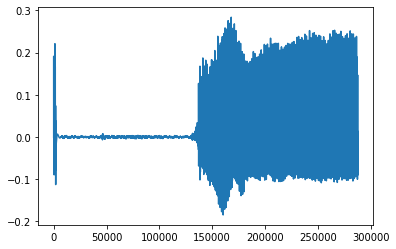

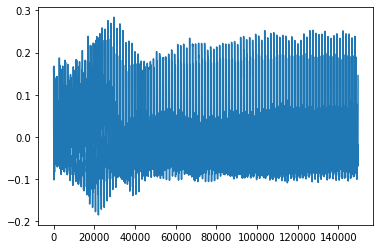

In [59]:
# record a trial
onset_detect = 0.15

fs = 192000  # Sample rate
seconds = 1.5  # Duration of recording

print("Recording")
data = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()  # Wait until recording is finished

plt.figure()
plt.plot(data)

data = data[10000:]

data = data[np.argmax(data > onset_detect):]

plt.figure()
plt.plot(data)


write("/Users/anantajit/Desktop/UCSF/mydata/me2/trial" + str(tn) + ".wav", fs, data)  # Save as WAV file 

print(tn)

tn += 1

In [58]:
tn = 14